# Examples UML

In [4]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
%matplotlib inline

autotexts = datasets.fetch_20newsgroups('rec.autos', remove=('headers', 'footers', 'quotes'), subset='train')['data']
religiontexts = datasets.fetch_20newsgroups('soc.religion.christian', remove=('headers', 'footers', 'quotes'), subset='train')['data']

texts = autotexts[:20] + religiontexts[:20]

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


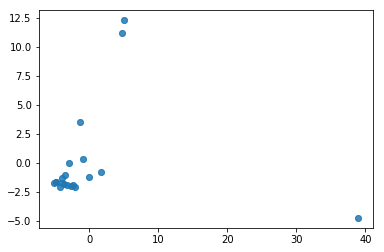

In [2]:
myvec = CountVectorizer(texts, max_df=.5, min_df=5)
mypca = PCA(n_components=2)

mypipe = make_pipeline(myvec, FunctionTransformer(lambda x: x.todense(), accept_sparse=True), mypca)

r = mypipe.fit_transform(texts)

plt.scatter([e[0] for e in r], [e[1] for e in r], alpha=.6)

In [ ]:
mysvd = TruncatedSVD(n_components=2)
mypipe = make_pipeline(myvec, mysvd)
r = mypipe.fit_transform(texts)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

k = 5

vec = TfidfVectorizer(min_df=5, max_df=.4)
features = vec.fit_transform(texts)
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
predictions = km.fit_predict(features)


In [7]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()

print("Top terms per cluster:")

for i in range(k):
    print("Cluster {}: ".format(i), end='')
    for ind in order_centroids[i, :10]:
        print("{} ".format(terms[ind]), end='')
    print()

Top terms per cluster:
Cluster 0: may as we an where one know only by there 
Cluster 1: list my file add when at what most same trying 
Cluster 2: which like into few data before better used how anyone 
Cluster 3: they before article things rather understanding just system than set 
Cluster 4: was but out as about my some there up would 
